# Cardiovascular Disease Dataset

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

⭐ Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

⭐Run the following code to read in the "cardio.csv" file.

In [2]:
df = pd.read_csv("cardio.csv", sep=";")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.shape

(70000, 13)

In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


⭐Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [26]:
df = df[df["ap_hi"] < 170]
df = df[df["ap_hi"] > 90]

In [27]:
df = df[df["ap_lo"] < 110]
df = df[df["ap_lo"] > 60]

In [31]:
df = df.sample(n = 500)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
8351,11923,19533,2,168,92.0,160,100,2,1,0,0,1,0
47021,67152,19130,2,165,85.0,140,80,1,1,0,0,1,1
36412,52006,16897,2,173,74.0,130,80,2,1,0,0,1,1
65952,94144,17959,1,157,55.0,130,80,1,1,0,0,1,1
49112,70114,21927,1,174,69.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,13857,21976,2,168,71.0,120,80,3,3,0,0,1,1
59229,84571,21052,2,166,65.0,120,70,1,1,0,0,1,0
7211,10275,23443,2,182,82.0,110,80,1,1,0,0,1,0
23216,33175,17719,2,163,74.0,120,80,1,1,0,0,1,0


## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

⭐What is the mean for Systolic blood pressure?

In [32]:
df.ap_hi.mean()

125.668

⭐What is the standard deviation for Systolic blood pressure?

In [33]:
df.ap_hi.std()

13.27713601200814

⭐What is the standard error of the mean for Systolic blood pressure?

In [34]:
df.ap_hi.sem()

0.5937715733872133

⭐What are the descriptive statistics of the mean for Systolic blood pressure?

In [35]:
df.ap_hi.describe()

count    500.000000
mean     125.668000
std       13.277136
min      100.000000
25%      120.000000
50%      120.000000
75%      140.000000
max      165.000000
Name: ap_hi, dtype: float64

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

💡A point estimate is a single number.

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval.

💡However, confidence intervals provide much more information and are preferred when making inferences.

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

In [36]:
stats.t.interval(0.99, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(124.13267434296377, 127.20332565703625)

In [37]:
stats.t.interval(0.95, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(124.50139953823316, 126.83460046176685)

In [38]:
stats.t.interval(0.90, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(124.68951611464966, 126.64648388535035)

## One Sample t Test

⭐Investigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

💡Assumptions

💡Null and Alternative Hypothesis

💡Test Statistic

💡P-value

💡Conclusion

Conduct the significance test. Use scipy.stats.ttest_1samp

In [ ]:
# H0: mu = 122
# H1: mu != 122

In [39]:
stats.ttest_1samp(df.ap_hi, 122)

Ttest_1sampResult(statistic=6.177459757926165, pvalue=1.3528627810886882e-09)

Result : reject to null

## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [40]:
df.groupby("gender").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,308.0,125.418831,13.096854,100.0,120.0,120.0,140.00,160.0
2,192.0,126.067708,13.586280,100.0,120.0,120.0,131.25,165.0


___🚀Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

In [41]:
stats.levene(df[df["gender"]==1]["ap_hi"], df[df["gender"]==2]["ap_hi"])

LeveneResult(statistic=0.43936898773483885, pvalue=0.5077338450153595)

In [42]:
stat, p = stats.levene(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=0.439, p=0.508
The population variances of group 1 and 2 are equal (fail to reject H0)


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [43]:
stats.ttest_ind(df[df["gender"]==1]["ap_hi"], df[df["gender"]==2]["ap_hi"], equal_var=True)

Ttest_indResult(statistic=-0.5311123723301153, pvalue=0.5955776994258131)

## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

⭐Draw a boxplot to see the relationship.

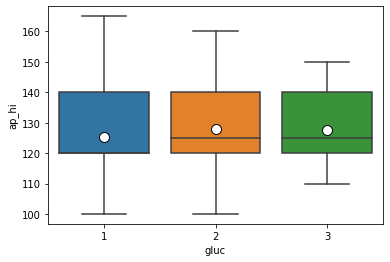

In [45]:
sns.boxplot(x="gluc", y="ap_hi", data=df, showmeans=True,  meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

⭐Show the descriptive statistics of 3 groups.

In [46]:
df.groupby("gluc").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gluc,,,,,,,,
1,415.0,125.240964,13.416219,100.0,120.0,120.0,140.0,165.0
2,47.0,127.851064,14.229453,100.0,120.0,125.0,140.0,160.0
3,38.0,127.631579,9.982203,110.0,120.0,125.0,140.0,150.0


In [ ]:
#H0: All means are equal (mu1 = mu2 = mu3)
#H1: At least one mean is different.

⭐Conduct the relavant statistical test to see if there is a significant difference between the mean of the groups.

In [47]:
stats.f_oneway(df[df["gluc"]==1]["ap_hi"],
               df[df["gluc"]==2]["ap_hi"],
               df[df["gluc"]==3]["ap_hi"])

F_onewayResult(statistic=1.266894127835099, pvalue=0.2826133290283423)

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [49]:
multicomp = MultiComparison(df["ap_hi"], df["gluc"])

In [50]:
tukey = multicomp.tukeyhsd(alpha=0.05)

In [51]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   2.6101 0.4099  -2.191 7.4112  False
     1      3   2.3906 0.5359 -2.8966 7.6778  False
     2      3  -0.2195    0.9  -7.025 6.5861  False
---------------------------------------------------


## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

In [52]:
#H0: The two categorical variables are independent
#H1: The two categorical variables are dependent

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 8351 to 44597
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   age          500 non-null    int64  
 2   gender       500 non-null    int64  
 3   height       500 non-null    int64  
 4   weight       500 non-null    float64
 5   ap_hi        500 non-null    int64  
 6   ap_lo        500 non-null    int64  
 7   cholesterol  500 non-null    int64  
 8   gluc         500 non-null    int64  
 9   smoke        500 non-null    int64  
 10  alco         500 non-null    int64  
 11  active       500 non-null    int64  
 12  cardio       500 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 70.9 KB


⭐Create a crosstab using Pandas.

In [54]:
ct = pd.crosstab(df.active, df.cardio)
ct

cardio,0,1
active,,
0,40,63
1,208,189


⭐Conduct chi-square test to see if there is a relationship between 2 categorical variables.

In [55]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [56]:
print("test statistic", chi)
print("p-value", p)

test statistic 5.483500977077132
p-value 0.019196773880810324


In [ ]:
#There is statistically significant relationship between activity and cardio.

In [57]:
dof

1

⭐Conduct chi-square test to see if there is a relationship between cholestrol and cardio.

In [58]:
ct = pd.crosstab(df.cardio, df.cholesterol)
ct

cholesterol,1,2,3
cardio,,,
0,211,24,13
1,154,58,40


In [59]:
ct1 = pd.crosstab(df.cholesterol, df.cardio)
ct1

cardio,0,1
cholesterol,,
1,211,154
2,24,58
3,13,40


In [61]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [62]:
print("test statistic", chi)
print("p-value", p)

test statistic 36.72399815563749
p-value 1.0604376137983124e-08


In [63]:
chi, p, dof, expected = stats.chi2_contingency(ct1)

In [64]:
print("test statistic", chi)
print("p-value", p)

test statistic 36.72399815563749
p-value 1.0604376137983124e-08


In [ ]:
#There is statistically significant relationship between cholestrol and cardio.